# Selection of non buchwald smc ligands

data preparation          
No yield is included in this dataset.               
Shape: 60~ Phosphine ligands, 196 columns of features

In [119]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline

import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import DataStructs
from rdkit import Chem
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions

In [120]:
#from rxn_yields.data import generate_buchwald_hartwig_rxns
#df = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name='FullCV_01')
df_origin = pd.read_excel('smc_data.xlsx', sheet_name='Pure_DFT_SMC')
df_origin = df_origin.sample(frac=1,random_state=42)
df_x = df_origin.drop(columns = ['ID.1','y1','y2','y3','y4'])
df_x = df_x.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_x = df_x.drop(columns = ['y13','y14','y15','y16','y17','y18','y19','buch'])

In [121]:
df_x

,Unnamed: 0,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,...,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202
54,548,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)c2...,566,-0.053857,1.840156,-0.219751,-0.020621,-0.120186,0.199130,0.036271,...,2708.919028,207.3,201.4,27.2,27.2,20,63,100,80,65
62,739,O=C(O)c1ccc(P(c2ccc(C(F)(F)F)cc2)c2ccc(C(F)(F)...,797,-0.024191,1.900147,-0.256970,-0.079570,-0.168270,0.177400,0.079805,...,135.847000,159.1,159.1,28.2,28.1,1,0,0,3,1
0,5,C1C2CC3CC1CC(P(C14CC5CC(CC(C5)C1)C4)C14CC5CC(C...,6,-0.071244,1.780166,-0.209940,0.016420,-0.096760,0.226360,0.020681,...,74.093528,177.9,177.9,36.6,36.6,2,0,1,14,2
45,238,C1N2CN3CN1CP(C2)C3,243,-0.047461,1.860160,-0.221150,0.032800,-0.094175,0.253950,0.017462,...,5.301278,111.8,111.7,21.3,21.3,0,0,0,6,1
5,13,CP(C(C)(C)C)C(C)(C)C,14,-0.064759,1.782111,-0.223490,0.033340,-0.095075,0.256830,0.017598,...,5.042583,164.4,164.2,31.5,31.5,25,26,7,54,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,737,O=C(O)c1cccc(P(c2cccc(C(F)(F)F)c2)c2cccc(C(F)(...,795,-0.028159,1.894808,-0.253855,-0.073234,-0.163545,0.180621,0.074049,...,1567.829444,163.2,156.5,28.1,27.9,5,0,0,6,1
7,20,CCP(CC)CC,21,-0.062157,1.826696,-0.230615,0.036188,-0.097214,0.266803,0.017713,...,20.388139,159.0,140.3,26.6,24.4,31,4,1,38,22
42,203,c1ccc(-p2c3ccccc3c3ccccc32)cc1,208,-0.041464,1.893024,-0.235070,-0.046860,-0.140965,0.188210,0.052790,...,31.557194,144.2,142.7,26.2,26.2,3,0,2,14,3
14,67,c1ccc(P(C2CCCCC2)C2CCCCC2)cc1,68,-0.059782,1.802830,-0.228121,-0.022783,-0.125452,0.205338,0.038326,...,468.486889,166.3,155.7,30.9,28.8,42,33,27,76,35


# Correlation Analysis

In [122]:
corr_matrix = df_x.corr()

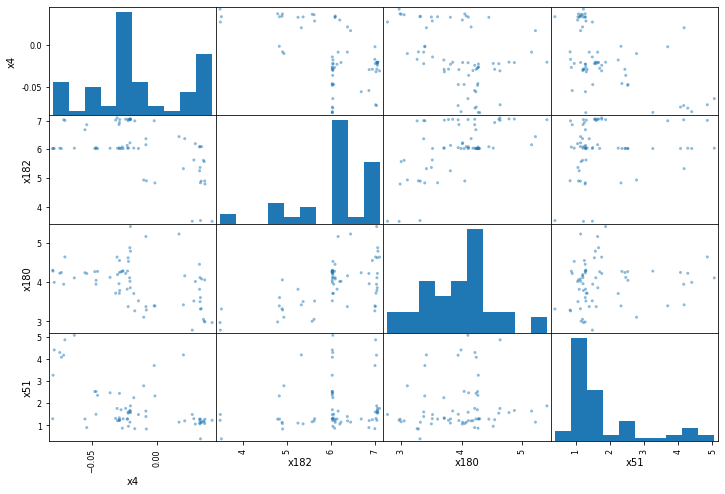

In [123]:
from pandas.plotting import scatter_matrix

attributes = ["x4", "x182", "x180",
              "x51"]
scatter_matrix(df_x[attributes], figsize=(12, 8));

# Select those special ligands, and Show them

In [124]:
# Select ligands with x4(LUMO Energy) in range which we hypothesis to provide yields
list_features = []
for i in df_x['x4']:
    if -0.03<i<-0.01:
        list_features.append(i)
    elif 0.02<i<0.04:
        list_features.append(i)
    else:
        continue
df_ligands_selected = pd.DataFrame({'x4':list_features})


In [125]:
df_dft_selected = df_x.loc[df_x['x4'].isin(df_ligands_selected['x4'])]

In [126]:
# Select ligands with x87(Vbur min) in range which Vbur min<32%
list_features = []
df_Vburmin = df_x['x87']/179.59
for i in df_Vburmin:
    if i<0.32:
        list_features.append(i)
    else:
        continue
df_ligands_selected = pd.DataFrame({'x87':list_features})

In [127]:
#Select ligands from x4 threshold with Vburmin<32% 
df_dft_selected2 = df_dft_selected.loc[df_Vburmin.isin(df_ligands_selected['x87'])]

#This following line allows only selection2 to be made - selection of all ligands with vburmin<32
#df_dft_selected2 = df_x.loc[df_Vburmin.isin(df_ligands_selected['x87'])]

In [128]:
# Select ligands with x87(Vbur min) in range which Dipolemoment<2.9
list_features = []
for i in df_x['x51']:
    if i<2.9:
        list_features.append(i)
    else:
        continue
df_ligands_selected = pd.DataFrame({'x51':list_features})

In [129]:
#Select ligands from x4 threshold and Vburmin<32% with dipolemoment<2.9
df_dft_selected3 = df_dft_selected2.loc[df_dft_selected2['x51'].isin(df_ligands_selected['x51'])]

#This following line allows only selection3 to be made 
#df_dft_selected3 = df_x.loc[df_x['x51'].isin(df_ligands_selected['x51'])]

Turns out although x51 is 0.4~ correlated with yield, it does not classify any ligands in this particular case.

Ligands that are not selected by this method

In [130]:
df_dft_nonselected =df_x.loc[~df_x['ID'].isin(df_dft_selected3['ID'])]

In [131]:
df_dft_nonselected.shape

(34, 208)

print out representative phosphine

['Cl', 'C', '1', '=', 'C', 'C', '=', 'C', '(', 'O', 'C', ')', 'C', '=', 'C', '1', '.', 'O', 'B', '(', 'O', ')', 'C', '1', '=', 'C', 'C', '=', 'C', 'C', '=', 'C', '1', '>>', 'C', 'O', 'C', '(', 'C', '=', 'C', '1', ')', '=', 'C', 'C', '=', 'C', '1', 'C', '2', '=', 'C', 'C', '=', 'C', 'C', '=', 'C', '2']


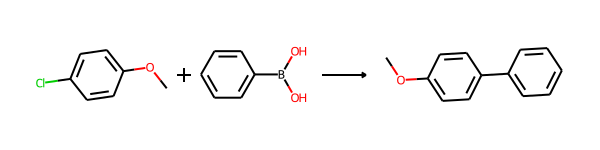

In [132]:
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw

smiles_tokenizer = get_default_tokenizer()

reaction_smiles = 'ClC1=CC=C(OC)C=C1.OB(O)C1=CC=CC=C1>>COC(C=C1)=CC=C1C2=CC=CC=C2'
rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles,useSmiles=True)

print(smiles_tokenizer.tokenize(reaction_smiles))
rxn


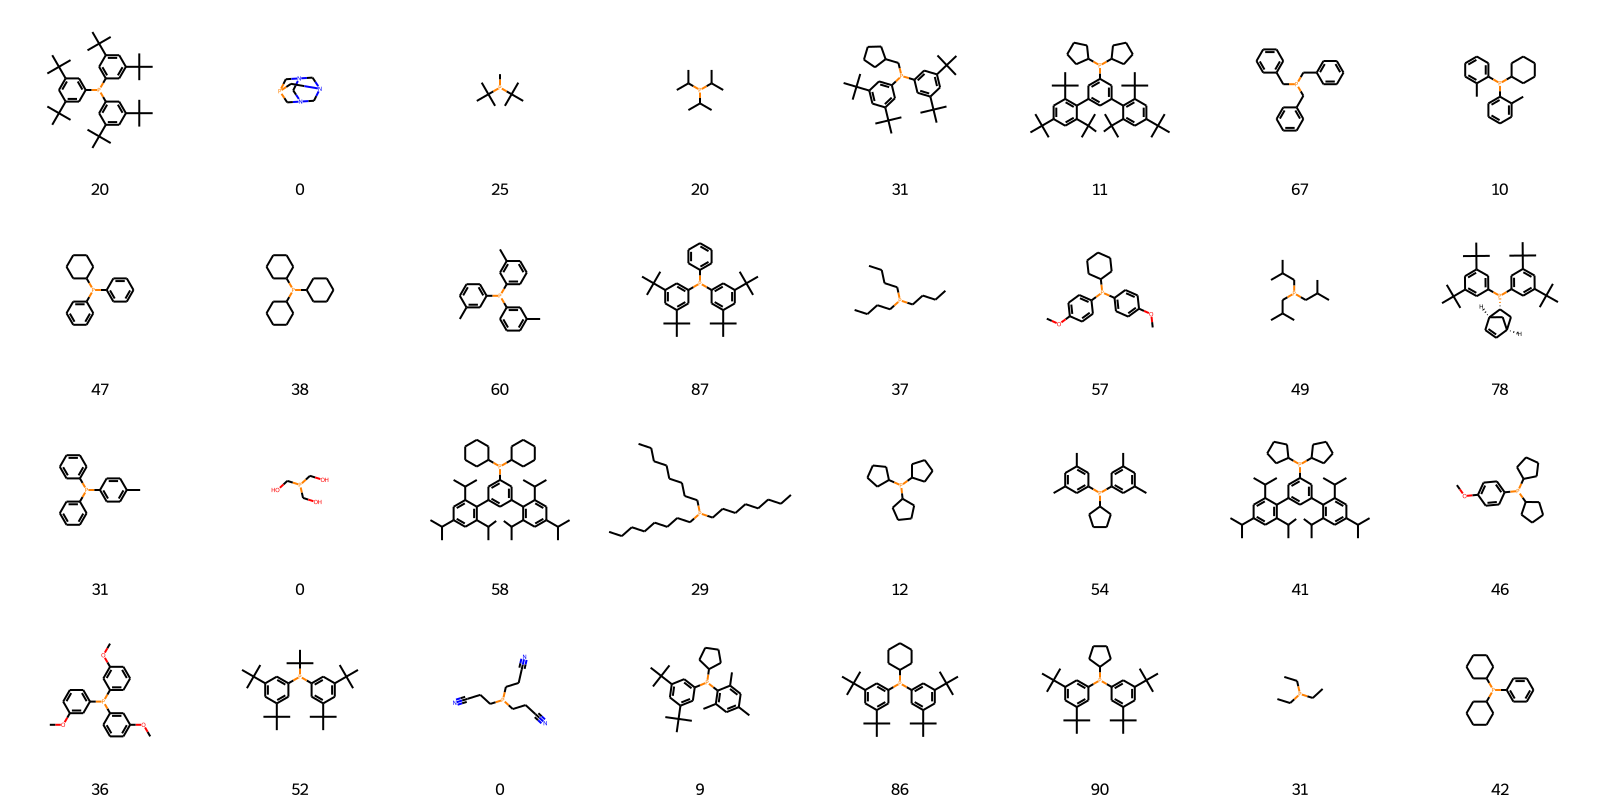

In [133]:
import pandas as pd
from rdkit.Chem import PandasTools

#mols = [Chem.MolFromSmiles(smi) for smi in df_dft_selected2['SMILES']]
#Draw.MolsToGridImage(mols, molsPerRow=8, legendsCol='x198',subImgSize=(200, 200))
PandasTools.AddMoleculeColumnToFrame(df_dft_selected3, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_dft_selected3, legendsCol="x198", molsPerRow=8)

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\rdkit\Chem\PandasTools.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


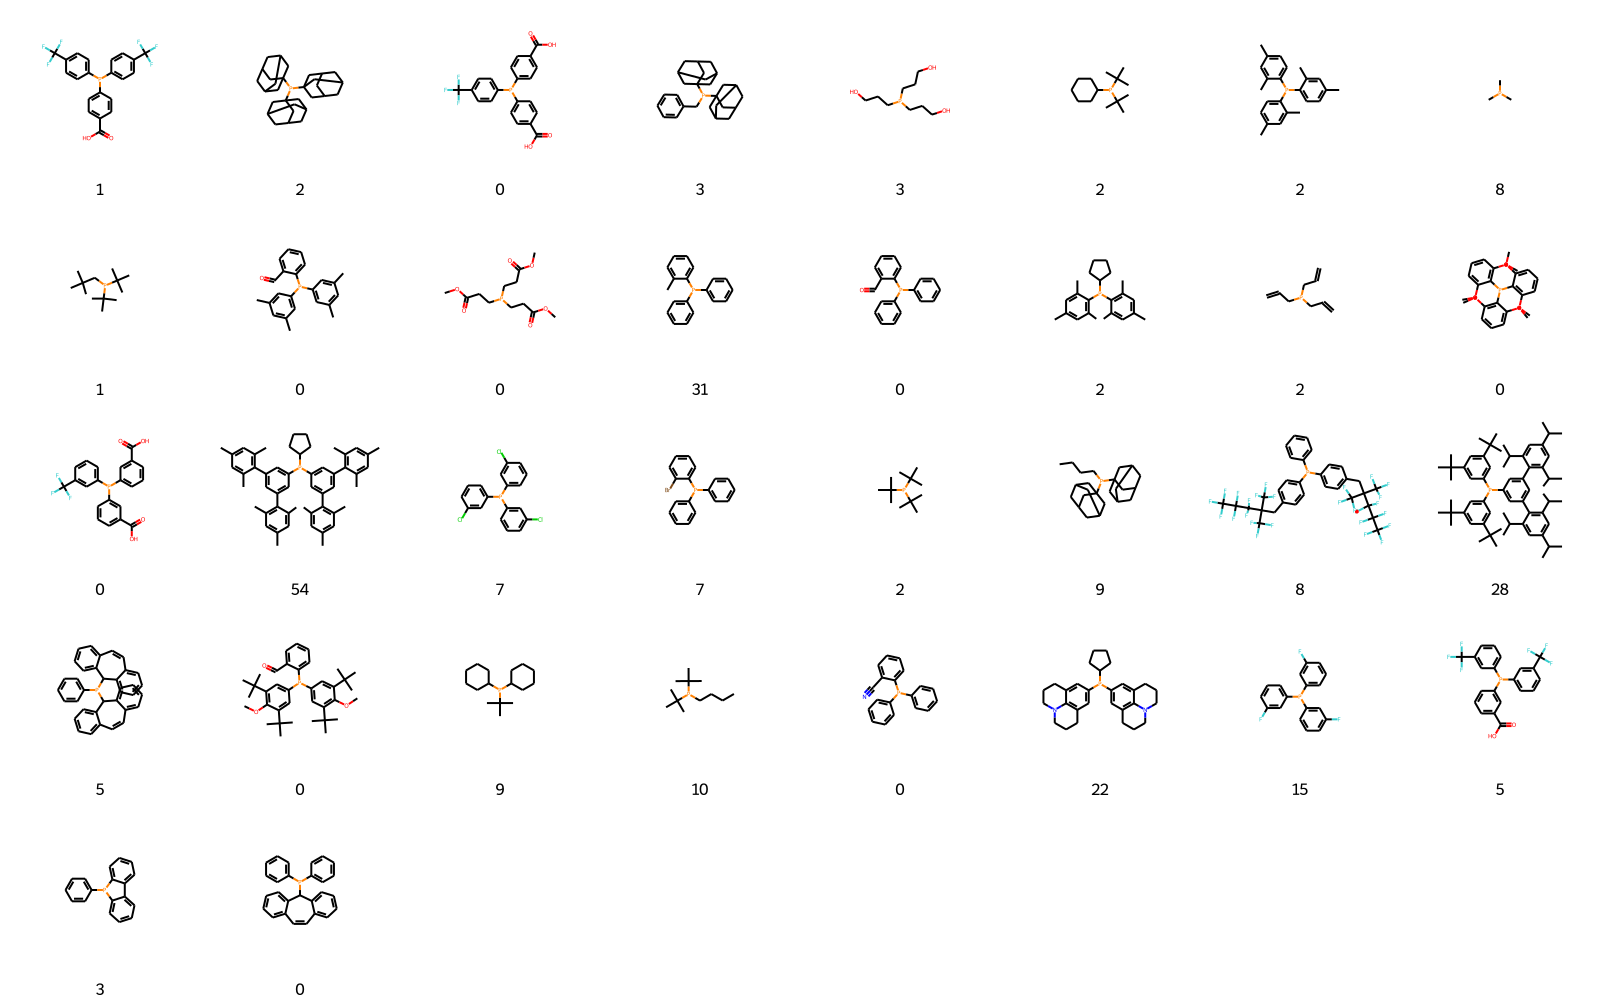

In [134]:
PandasTools.AddMoleculeColumnToFrame(df_dft_nonselected, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_dft_nonselected, legendsCol="x198", molsPerRow=8)